In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

sns.set_theme()

In [4]:
# For single layer perceptron, we would use a sub-sample of original wine data.

wine_data = pd.read_csv("D:\\2021 - Fall Semester\\1 - class\\577data\\wine.csv")

In [5]:
wine_data

,type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [99]:
# For simplicity, we only pick alcohol and color intensity to judge the type of alcohol. 
# This is very strightforward as color and alcohol are two significant indicator of wine type.


sub_wine = wine_data.loc[:, ['type', 'Alcohol', 'Color intensity']]

sub_wine

,type,Alcohol,Color intensity
0,1,14.23,5.64
1,1,13.20,4.38
2,1,13.16,5.68
3,1,14.37,7.80
4,1,13.24,4.32
...,...,...,...
173,3,13.71,7.70
174,3,13.40,7.30
175,3,13.27,10.20
176,3,13.17,9.30


In [117]:
X = sub_wine.iloc[:, 1:]
y = sub_wine['type']

y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: type, Length: 178, dtype: int64

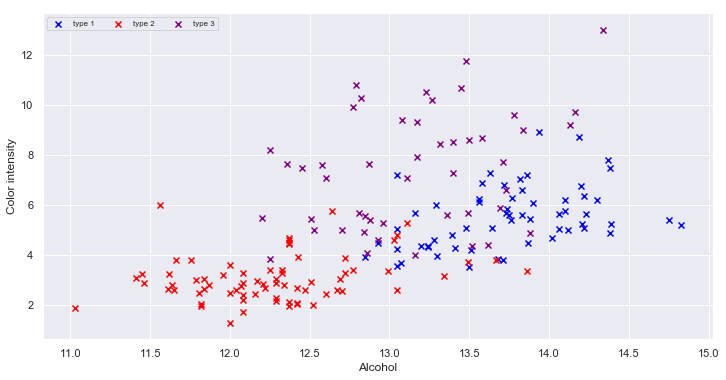

In [101]:
# Visualize the data

plt.figure(figsize=(12,6))
t1 = plt.scatter(sub_wine.loc[sub_wine['type']==1, 'Alcohol'], sub_wine.loc[sub_wine['type']==1, 'Color intensity'], marker = 'x', c='blue')
t2 = plt.scatter(sub_wine.loc[sub_wine['type']==2, 'Alcohol'], sub_wine.loc[sub_wine['type']==2, 'Color intensity'], marker = 'x', c='red')
t3 = plt.scatter(sub_wine.loc[sub_wine['type']==3, 'Alcohol'], sub_wine.loc[sub_wine['type']==3, 'Color intensity'], marker = 'x', c='purple')
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.legend((t1, t2, t3),
           ('type 1', 'type 2', 'type 3'),
           scatterpoints = 1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.show()

In [102]:
class Perceptron(object):
    def __init__(self, eta = 0.5, epochs = 5000):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [118]:
# Necessary to transform dataframe into matrix type, otherwise zip() or enumerate() will read dataframe header
train_x, test_x, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

train_x = train_x[["Alcohol", "Color intensity"]].values
test_x = test_x[["Alcohol", "Color intensity"]].values
y_train = y_train.values
y_test = y_test.values

In [119]:
y_train

array([2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 2, 3, 3, 1, 2, 2, 1, 2,
       3, 2, 2, 1, 3, 2, 3, 1, 2, 1, 2, 1, 3, 3, 3, 3, 2, 2, 1, 3, 1, 2,
       3, 1, 2, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1,
       1, 3, 1, 2, 3, 3, 1, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 2, 2, 2, 3, 3,
       2, 1, 2, 1, 3, 2, 2, 1, 1, 2, 1, 1, 1, 3, 1, 3, 3, 1, 2, 2, 3, 1,
       2, 2, 1, 1, 1, 2, 2, 1, 3, 3, 2, 2, 2, 1, 3, 3, 3, 3, 3, 2, 1, 1,
       3, 2, 2, 3, 2, 3, 3, 2, 3, 1], dtype=int64)

In [122]:
p1 = Perceptron(epochs=10000)

In [123]:
p1.train(train_x, y_train)

In [128]:
y_hat = p1.predict(test_x)

In [129]:
sum(y_test == y_hat)/len(y_test)

0.3888888888888889

In [130]:
print(y_test == y_hat)

[False False  True False  True False False  True False False  True  True
 False  True False False False  True False  True  True False False False
  True False  True  True  True False False False False  True False False]


d:\anaconda\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


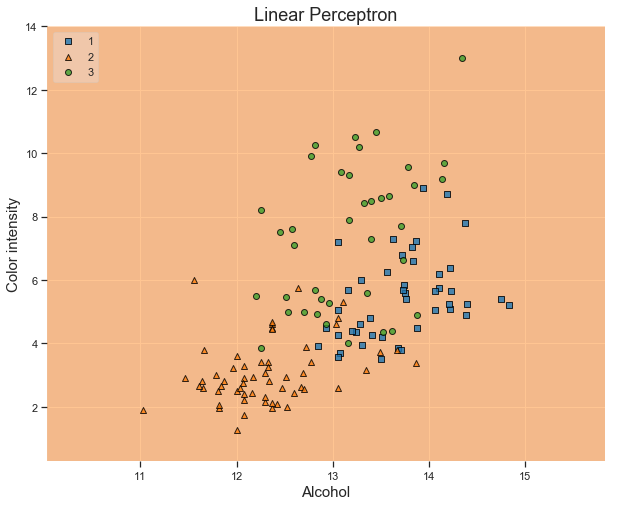

In [127]:
plt.figure(figsize = (10, 8))
plot_decision_regions(train_x, y_train, clf = p1, legend=2)
plt.title("Linear Perceptron", fontsize = 18)
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("Color intensity", fontsize = 15)
plt.show()

### Here we find the predict accuracy of perceptron is extremely bad, and the decision region could not be shown. However, this confirms an understanding that a single layer perceptron function would never converge on non-linearly separable data. And wine data is just a dataset that are not linearly separable.